# Project
## goal: exploratory analyses on cancer related AADR in population over 50, and predict AADR with a linear model
###### (AADR: 'Age-Adjusted Death Rate - deaths per 100,000')
### outline:  we will be using pruned pop_and_cancer data frame with 2017 data, this will be combined with the county health data(2018 data is updated upto 2017) 
#### * read pop_and_cancer and county health data
#### * merge on county
#### * rename columns
#### * plot selected columns and explore relationship
#### * build a linear model and evaluate its performance


Notes: 
excess drinking and smoking comulative over years 2010-2018 with cancer related AADR in % population over 50 or total population 

In [116]:
# import pandas as pd, seaborn as sns, matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# * read pop_and_cancer and county health data
pop_and_cancer = pd.read_csv('data/pop_and_cancer.csv')
pop_and_cancer.head()

,Unnamed: 0,County,Pop2017all,Median_age_2017,Met Healthy People Objective of 161.4?,"Age-Adjusted Death Rate - deaths per 100,000",Average Annual Count,Recent Trend,Recent 5-Year Trend in Death Rates,hospice_per_county,percent_pop_over_50_2017,normalized_hospice_rate
0,0,Anderson,76257.0,43.2,No,180.6,195.0,falling,-0.7,0,0.412762,0.000000
1,1,Bedford,48117.0,37.5,No,182.7,92.0,falling,-0.7,0,0.339755,0.000000
2,2,Benton,15986.0,47.4,No,233.9,59.0,stable,0.3,0,0.464281,0.000000
3,3,Bledsoe,14717.0,43.9,No,170.0,31.0,falling,-1.3,0,0.410546,0.000000
4,4,Blount,129929.0,43.8,No,168.2,283.0,falling,-0.9,1,0.414311,0.769651


In [108]:
# Columns of interest : make sure you copy
PnC_sub = pop_and_cancer[['County','Age-Adjusted Death Rate - deaths per 100,000','percent_pop_over_50_2017','Met Healthy People Objective of 161.4?','Recent 5-Year Trend in Death Rates','normalized_hospice_rate']].copy()

In [109]:
# rename to convenient names
PnC_sub.rename(index=str, inplace='True', columns={
    'Age-Adjusted Death Rate - deaths per 100,000': 'AADR',
    'percent_pop_over_50_2017': 'popup50',
    'Met Healthy People Objective of 161.4?':'Met_HP_objective',
    'Recent 5-Year Trend in Death Rates':'5yr_trend',
    'normalized_hospice_rate':'norm_hr'
})

In [112]:
PnC_sub.head()
# todo: replace No = 0, yes = 1;

,County,AADR,popup50,Met_HP_objective,5yr_trend,norm_hr
0,Anderson,180.6,0.412762,0,-0.7,0.000000
1,Bedford,182.7,0.339755,0,-0.7,0.000000
2,Benton,233.9,0.464281,0,0.3,0.000000
3,Bledsoe,170.0,0.410546,0,-1.3,0.000000
4,Blount,168.2,0.414311,0,-0.9,0.769651


In [111]:
# can be done with dummies
for row in PnC_sub.index:
    if (PnC_sub.loc[row,('Met_HP_objective')] == 'Yes'):
        PnC_sub.loc[row,('Met_HP_objective')] = 1
    if (PnC_sub.loc[row,('Met_HP_objective')] == 'No'):
        PnC_sub.loc[row,('Met_HP_objective')] = 0


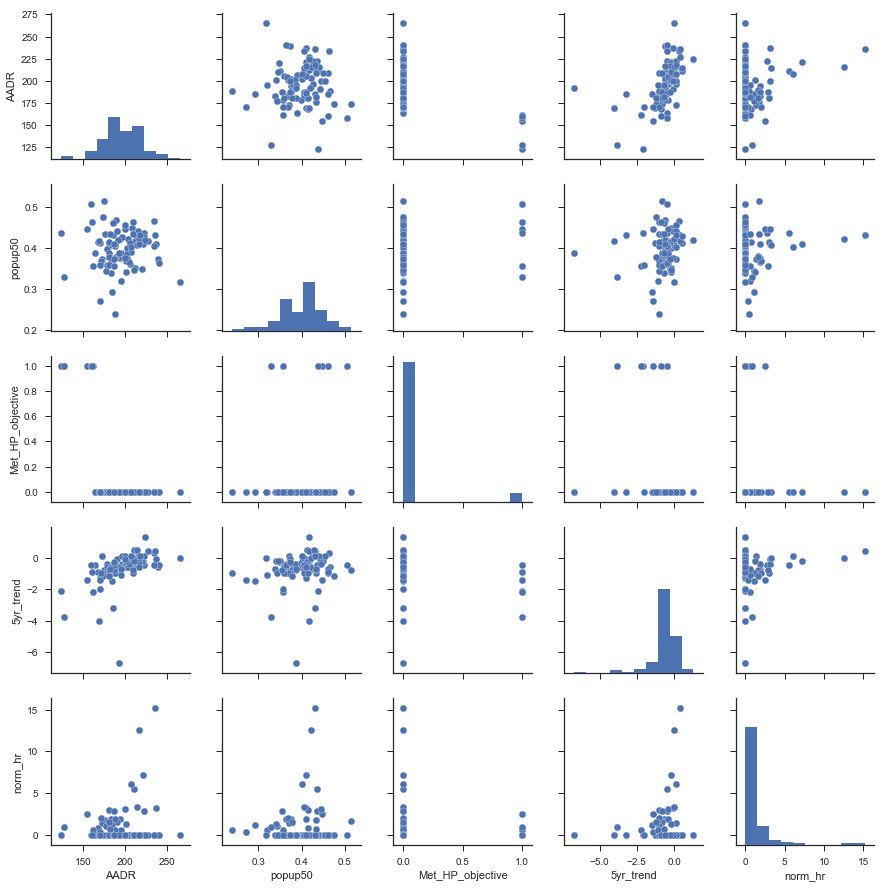

In [113]:
sns.set(style = 'ticks', color_codes = True)
PnC_sub_pairplot = sns.pairplot(PnC_sub)

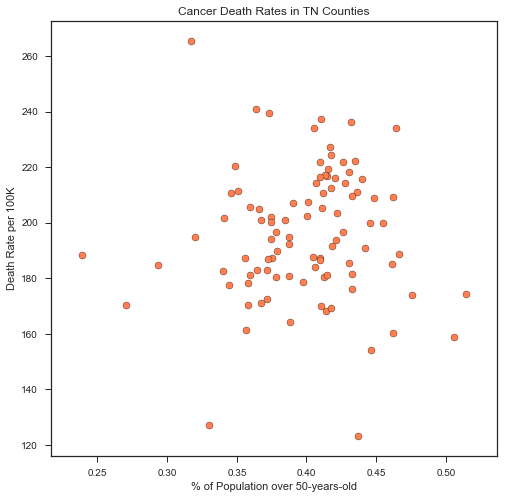

In [117]:
plt.figure(figsize = (8,8))
plt.scatter(PnC_sub.popup50, PnC_sub.AADR, 
            color = 'coral', edgecolor = 'black')
plt.xlabel('% of Population over 50-years-old')
plt.ylabel('Death Rate per 100K')
plt.title('Cancer Death Rates in TN Counties')
plt.show()

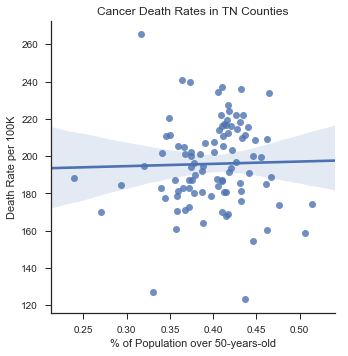

In [125]:
sns.lmplot(x = 'popup50', y = 'AADR', data = PnC_sub)
plt.xlabel('% of Population over 50-years-old')
plt.ylabel('Death Rate per 100K')
plt.title('Cancer Death Rates in TN Counties')
plt.show();

In [132]:
# calculating pearson and R2 
#?sns.jointplot()
#?stats.pearsonr()
def r2p(x, y):
    [pearR, pval] = stats.pearsonr(x, y)
    return [stats.pearsonr(x, y)[0] ** 2, pval]
def Rp(x, y):
    [pearR, pval] = stats.pearsonr(x, y)
    return [pearR, pval]

C:\Users\janveva\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\janveva\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


R^2 AND P-VALUE
[0.0005698009143010139, 0.8183920636476566]


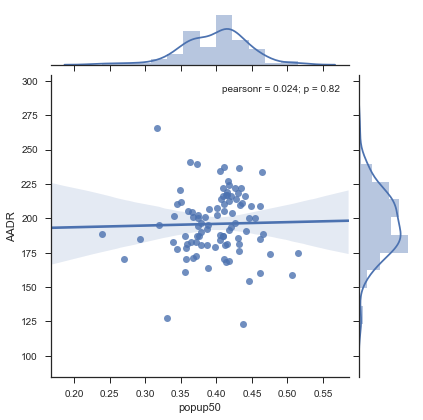

In [136]:
#sns.jointplot(PnC_sub.popup50, PnC_sub.AADR, kind="reg", stat_func=Rp)
sns.jointplot(PnC_sub.popup50, PnC_sub.AADR, kind="reg")
print('R^2 AND P-VALUE')
print(r2p(PnC_sub.popup50, PnC_sub.AADR))

In [62]:
# county health data
# did not read county names as columns, index became multi level due to FIPS, State, County
# edited the 1st row to include column labels in both sheets saved as _edit
chd = pd.read_excel('data/County_Health_Rankings_Tennessee_Data_2018_edit.xls',sheet_name="Ranked Measure Data")
chd_opt = pd.read_excel('data/County_Health_Rankings_Tennessee_Data_2018_edit.xls',sheet_name="Additional Measure Data")

In [63]:
# after evaluating column names and head & tail, we can safely drop all Unnamed columns
# Q: read hierchial column naming
# 
chd.columns
#chd.head()
#chd.tail()

Index(['FIPS', 'State', 'County', 'Premature death', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 154', 'Unnamed: 155', 'Unnamed: 156', 'Unnamed: 157',
       'Unnamed: 158', 'Long commute - driving alone', 'Unnamed: 160',
       'Unnamed: 161', 'Unnamed: 162', 'Unnamed: 163'],
      dtype='object', length=164)

In [56]:
?chd.drop()

In [64]:
# drop columns: 164 columns to 36 columns
col_chd_unnamed = [col for col in chd.columns if(col.find('Unnamed') != -1)]
chd.drop(columns = col_chd_unnamed, inplace = True)
chd.drop(columns = ['FIPS','State'], inplace = True)


col_chdOpt_unnamed = [col for col in chd_opt.columns if(col.find('Unnamed') != -1)]
chd_opt.drop(columns = col_chdOpt_unnamed, inplace = True)
chd_opt.drop(columns = ['FIPS','State'], inplace = True)


In [65]:
chd.drop([1], inplace = True)
chd_opt.drop([1], inplace = True)

In [67]:
# evaluate
chd.head()
#chd.columns
#chd.index
# first row still TN need to remove

,County,Premature death,Poor or fair health,Poor physical health days,Poor mental health days,Low birthweight,Adult smoking,Adult obesity,Food environment index,Physical inactivity,...,Income inequality,Children in single-parent households,Social associations,Violent crime,Injury deaths,Air pollution - particulate matter,Drinking water violations,Severe housing problems,Driving alone to work,Long commute - driving alone
0,County,Years of Potential Life Lost Rate,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,Unreliable,% Smokers,% Obese,Food Environment Index,% Physically Inactive,...,80th Percentile Income,# Single-Parent Households,# Associations,# Violent Crimes,# Injury Deaths,Average Daily PM2.5,Presence of violation,# Households with Severe Problems,% Drive Alone,# Workers who Drive Alone
2,Anderson,9628.95,19.0976,4.66651,4.68541,NaN,20.7124,30.9,7.3,34.2,...,93392,6290,120,199,377,10.7,No,3960,86.9789,27080
3,Bedford,9269.46,21.5416,4.80761,4.72276,NaN,21.3971,31.7,7.8,33.2,...,79346,4410,41,166,207,10,Yes,2610,80.9984,16599
4,Benton,12798.9,21.2046,5.24343,5.12287,NaN,22.6645,34.3,7.3,35.4,...,71704,993,23,33.6667,130,9.2,No,1030,83.6259,4811
5,Bledsoe,8044.17,22.0262,5.14685,4.78743,NaN,25.6071,31.7,7.8,34.4,...,80254,966,6,14,51,9.3,No,745,79.0538,3793


In [76]:
# sleep data
chd_opt.columns
sleep = chd_opt[['County','Insufficient sleep']]

In [ ]:
# sleep data
chd.columns
sleep = chd_opt[['County','Insufficient sleep']]